In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
%matplotlib inline

import seaborn as sns
style.use("fivethirtyeight")

In [2]:
style.use("fivethirtyeight")

#### A telecommunications company is concerned about the number of customers leaving their business for competitors. They need to understand who is leaving. You are required to assist this company and you have to find out who is leaving and why.
#### Typical information that is available about customers concerns demographics, behavioral data, revenue information. At the time of renewing contracts, some customers do and some do not: they churn. It would be extremely useful to know in advance which customers are at risk of churning, as to prevent it - especially in the case of high revenue customers.

#### a) Quick inspection of the data

In [3]:
data=pd.read_csv("telco.csv")

In [4]:
data.head()

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Churn,Int'l Plan,VMail Plan,Day Calls,Day Charge,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,State,Area Code
0,128,25,265.1,197.4,244.7,10.0,1,0,0,1,110,45.07,99,16.78,91,11.01,3,2.70,KS,415
1,107,26,161.6,195.5,254.4,13.7,1,0,0,1,123,27.47,103,16.62,103,11.45,3,3.70,OH,415
2,137,0,243.4,121.2,162.6,12.2,0,0,0,0,114,41.38,110,10.30,104,7.32,5,3.29,NJ,415
3,84,0,299.4,61.9,196.9,6.6,2,0,1,0,71,50.90,88,5.26,89,8.86,7,1.78,OH,408
4,75,0,166.7,148.3,186.9,10.1,3,0,1,0,113,28.34,122,12.61,121,8.41,3,2.73,OK,415


In [5]:
data.info() #no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Account Length  3333 non-null   int64  
 1   VMail Message   3333 non-null   int64  
 2   Day Mins        3333 non-null   float64
 3   Eve Mins        3333 non-null   float64
 4   Night Mins      3333 non-null   float64
 5   Intl Mins       3333 non-null   float64
 6   CustServ Calls  3333 non-null   int64  
 7   Churn           3333 non-null   int64  
 8   Int'l Plan      3333 non-null   int64  
 9   VMail Plan      3333 non-null   int64  
 10  Day Calls       3333 non-null   int64  
 11  Day Charge      3333 non-null   float64
 12  Eve Calls       3333 non-null   int64  
 13  Eve Charge      3333 non-null   float64
 14  Night Calls     3333 non-null   int64  
 15  Night Charge    3333 non-null   float64
 16  Intl Calls      3333 non-null   int64  
 17  Intl Charge     3333 non-null   f

In [7]:
data["State"]=data["State"].astype("str")

In [9]:
data["Churn"]=data["Churn"].astype("category")
data["Int'l Plan"]=data["Int'l Plan"].astype("category")
data["VMail Plan"]=data["VMail Plan"].astype("category")

In [10]:
data.dtypes

Account Length       int64
VMail Message        int64
Day Mins           float64
Eve Mins           float64
Night Mins         float64
Intl Mins          float64
CustServ Calls       int64
Churn             category
Int'l Plan        category
VMail Plan        category
Day Calls            int64
Day Charge         float64
Eve Calls            int64
Eve Charge         float64
Night Calls          int64
Night Charge       float64
Intl Calls           int64
Intl Charge        float64
State               object
Area Code            int64
dtype: object

#### b) Cluster the data using k-means, using 3, 5 and 7 clusters

In [11]:
telco=data.iloc[:,0:-2]
telco.head()

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Churn,Int'l Plan,VMail Plan,Day Calls,Day Charge,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge
0,128,25,265.1,197.4,244.7,10.0,1,0,0,1,110,45.07,99,16.78,91,11.01,3,2.70
1,107,26,161.6,195.5,254.4,13.7,1,0,0,1,123,27.47,103,16.62,103,11.45,3,3.70
2,137,0,243.4,121.2,162.6,12.2,0,0,0,0,114,41.38,110,10.30,104,7.32,5,3.29
3,84,0,299.4,61.9,196.9,6.6,2,0,1,0,71,50.90,88,5.26,89,8.86,7,1.78
4,75,0,166.7,148.3,186.9,10.1,3,0,1,0,113,28.34,122,12.61,121,8.41,3,2.73


In [12]:
x=telco.drop('Churn',axis=1)

In [13]:
y = data.iloc[ :, 7 ]

In [14]:
from sklearn.cluster import KMeans

In [15]:
# initialise all models manually

kmeans3 = KMeans(n_clusters=3)
kmeans5 = KMeans(n_clusters=5)
kmeans7 = KMeans(n_clusters=7)

In [16]:
kmeans3.fit(telco.drop('Churn',axis=1))
kmeans5.fit(telco.drop('Churn',axis=1))
kmeans7.fit(telco.drop('Churn',axis=1))


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [17]:
# initialise all models with function

clusters = [3, 5, 7]

names = list()

for n_cluster in clusters:
    # Initialize the object with n clusters
    kmeans = KMeans(n_clusters=n_cluster)

    # Create a model name
    names = "model" + str(n_cluster)

    # Assign models to your environment
    globals()[ names ] = kmeans.fit(x)

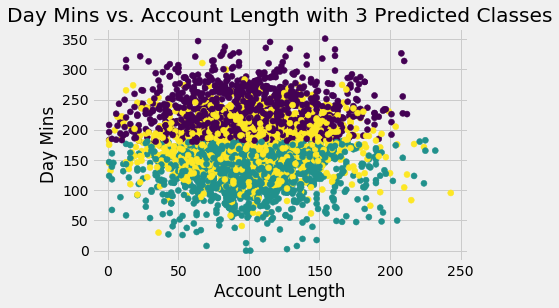

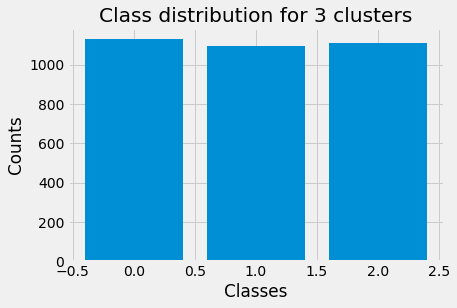

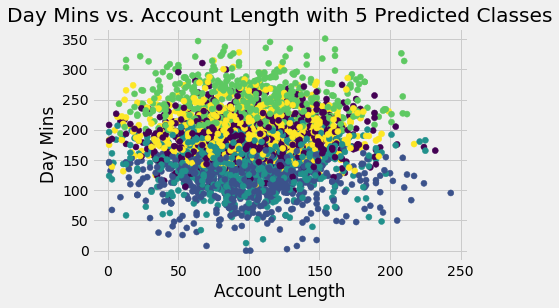

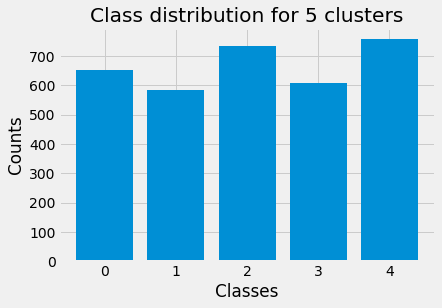

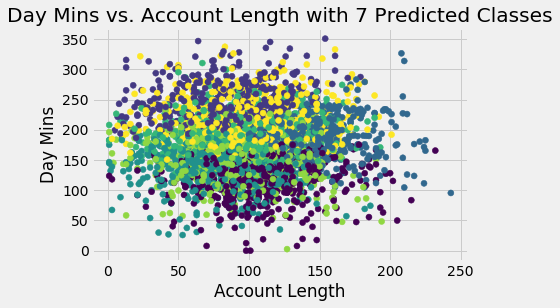

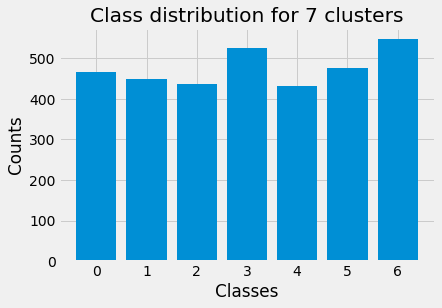

In [22]:
# plot clusters

models=["model3","model5","model7"]

for i, model in enumerate(models):
    predictions = eval(model + ".predict(x)")
    
    plt.scatter(x = x["Account Length"], y = x["Day Mins"],c = predictions)
    plt.xlabel("Account Length")
    plt.ylabel("Day Mins")
    plt.title("Day Mins vs. Account Length with {} Predicted Classes".format(clusters[i]))
    
    plt.show()
    
    
    value_counts = pd.Series(predictions).value_counts()
    index = pd.DataFrame(value_counts).index
    bar_data = pd.DataFrame(value_counts, columns = ["Counts"]).reset_index()
    
    plt.bar(index, value_counts)
    plt.xlabel("Classes")
    plt.ylabel("Counts")
    plt.title("Class distribution for {} clusters".format(clusters[i]))
    plt.show()
    

In [14]:
#kmeans3.cluster_centers_

#### c) Cluster the data using hierarchical clustering

In [24]:
# from sklearn.cluster import AgglomerativeClustering

# clustering = AgglomerativeClustering().fit(x)
# clustering

In [25]:
from scipy.cluster.hierarchy import dendrogram, linkage

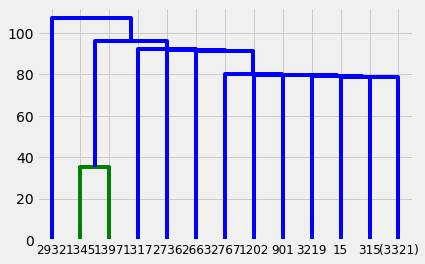

In [26]:
Z = linkage(x,"single")  # ward level shows everything

dendrogram(Z, p=10, truncate_mode="level")  
plt.show()

#### d) Evaluate the clusters obtained in the two previous questions using silhouette coefficients and silhouette plots

Silhouette analysis can be used to study the separation distance between the resulting clusters. The silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like number of clusters visually. This measure has a range of [-1, 1]. Silhouette coefficients (as these values are referred to as) near +1 indicate that the sample is far away from the neighboring clusters. A value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters and negative values indicate that those samples might have been assigned to the wrong cluster.

In [27]:
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

/opt/anaconda3/envs/PyEnv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [29]:
#silhouette score example

label=kmeans7.fit_predict(x)
silhouette_avg = silhouette_score(x, label)
silhouette_avg

The silhouette score for kmeans3 is 0.1475


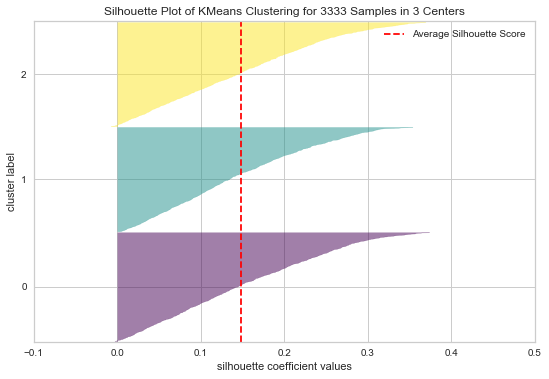

The silhouette score for kmeans5 is 0.1369


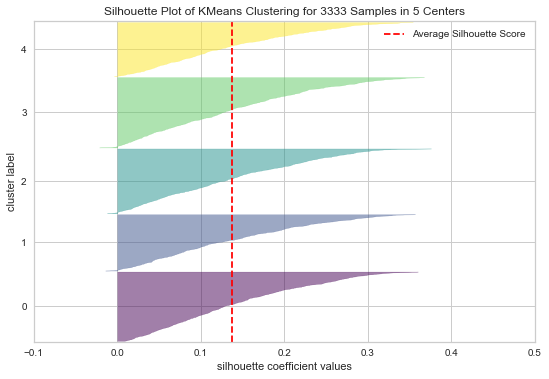

The silhouette score for kmeans7 is 0.1372


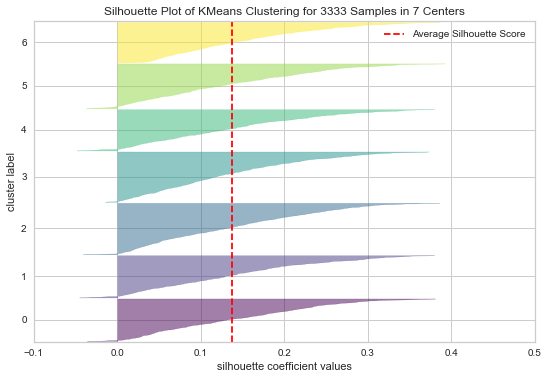

In [32]:
# silhouette score and plot for all the models

models=["kmeans3","kmeans5","kmeans7"]

for i, model in enumerate(models):
    
    current_predict = eval(model + ".predict(x)")
    current_model = eval(model)
    
    s_score = silhouette_score(x, current_predict)
    
    print("The silhouette score for {} is {:.4f}".format(models[i], s_score))
    
    visualizer = SilhouetteVisualizer(current_model, colors='viridis')

    visualizer.fit(x)       
    visualizer.show() 

#### e) Create test/train split

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=100)

#### f) Create a classification tree 

In [35]:
from sklearn.tree import DecisionTreeClassifier

In [36]:
dtree = DecisionTreeClassifier()

In [37]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [38]:
tree_predictions = dtree.predict(X_test)

In [39]:
from sklearn.metrics import classification_report,confusion_matrix

In [40]:
print(classification_report(y_test,tree_predictions))
# macro avg - when we have more classes; shows avg acc across classes

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      1153
           1       0.65      0.72      0.68       181

    accuracy                           0.91      1334
   macro avg       0.80      0.83      0.82      1334
weighted avg       0.91      0.91      0.91      1334



In [41]:
print(confusion_matrix(y_test,tree_predictions))

[[1084   69]
 [  51  130]]


#### g) Create a pipeline to normalize the data and create a logistic regression

In [42]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale, StandardScaler
from sklearn.linear_model import LogisticRegression

In [43]:
pipe_logit = make_pipeline(StandardScaler(), LogisticRegression())

#### h) Using the pipeline evaluate the performance of the model in terms of accuracy, precision and recall (use cross-validation)

In [44]:
from sklearn.model_selection import cross_validate, StratifiedKFold, KFold


In [55]:
CV_logit=cross_validate(pipe_logit,X_train,y_train,scoring=["accuracy","recall","precision"],cv=5)

In [56]:
CV_logit

{'fit_time': array([0.01936603, 0.02634501, 0.02153611, 0.01588583, 0.01583695]),
 'score_time': array([0.00657105, 0.00986171, 0.00805116, 0.00497627, 0.0050559 ]),
 'test_accuracy': array([0.8575    , 0.855     , 0.8475    , 0.845     , 0.85714286]),
 'test_recall': array([0.18333333, 0.25      , 0.24590164, 0.14754098, 0.16666667]),
 'test_precision': array([0.57894737, 0.53571429, 0.5       , 0.47368421, 0.58823529])}

In [60]:
print("The mean accuracy in the Cross-Validation is: {:.2f}%".format((np.mean(CV_logit["test_accuracy"])*100)))

The mean accuracy in the Cross-Validation is: 85.24%


#### i) Perform a (stratified) cross validation for a support vector machine with Gaussian kernel

Stratification seeks to ensure that each fold is representative of all strata of the data (to get the same percentage across classes in the folds as in the data)

In [ ]:
from sklearn.svm import SVC

In [61]:
svm_pipeline=make_pipeline(StandardScaler(), SVC(kernel="rbf"))

In [62]:
CV_svm=cross_validate(svm_pipeline,X_train,y_train,scoring=["accuracy","recall","precision"],
                      cv=StratifiedKFold(n_splits=5))
CV_svm

{'fit_time': array([0.10364509, 0.05479717, 0.04358459, 0.04428601, 0.05202913]),
 'score_time': array([0.016716  , 0.01148105, 0.01136923, 0.01371121, 0.01097989]),
 'test_accuracy': array([0.9075    , 0.915     , 0.915     , 0.885     , 0.90726817]),
 'test_recall': array([0.43333333, 0.51666667, 0.52459016, 0.32786885, 0.43333333]),
 'test_precision': array([0.89655172, 0.86111111, 0.86486486, 0.8       , 0.89655172])}

In [63]:
print("The mean accuracy in the Cross-Validation is: {:.2f}%".format((np.mean(CV_svm["test_accuracy"])*100)))

The mean accuracy in the Cross-Validation is: 90.60%


#### j) Plot the ROC curves for the above classifiers.

In [53]:
from sklearn.metrics import  plot_roc_curve

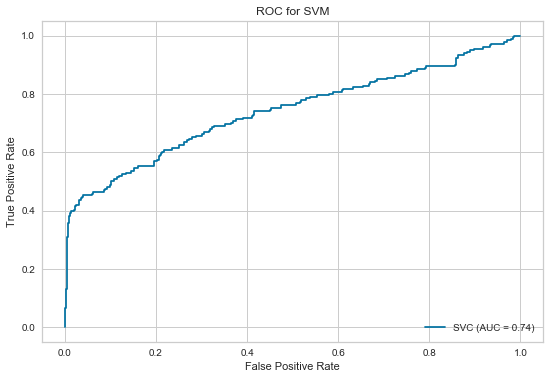

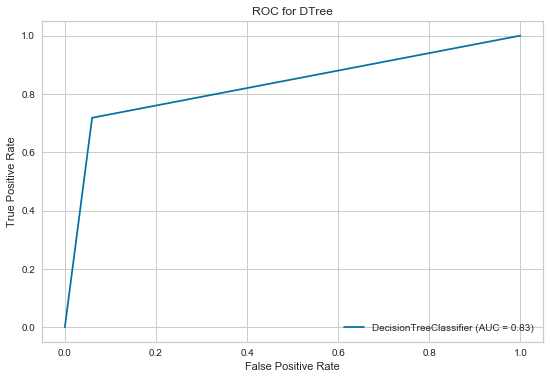

In [67]:
svm = SVC(kernel= "rbf")
fit = svm.fit(X_train, y_train)

plot_roc_curve(svm, X_test, y_test)
plt.title("ROC for SVM")
plt.show()

plot_roc_curve(dtree, X_test, y_test)
plt.title("ROC for DTree")
plt.show()

#### l) Create a bagged decision tree, boosting decision tree and random forest and evaluate the model performance

In [52]:
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, BaggingClassifier

In [53]:
ada = AdaBoostClassifier(n_estimators= 100)

ada.fit(X_train, y_train)

accuracy_score(y_pred = ada.predict(X_test), y_true= y_test)

0.8680659670164917

In [54]:
randf = RandomForestClassifier()

randf.fit(X_train, y_train)

accuracy_score(y_pred = randf.predict(X_test), y_true= y_test)

0.9610194902548725

In [55]:
bag = BaggingClassifier(base_estimator= DecisionTreeClassifier())

bag.fit(X_train, y_train)

accuracy_score(y_pred = bag.predict(X_test), y_true = y_test)

0.9460269865067467